<a href="https://colab.research.google.com/github/BaileyMeche/RecSystem_MIT_ADSP/blob/main/DataAnalysis_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

*Bailey Meche*

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:



Each entry as a row in this dataframe corresponds to an order from a restaurant. The cuisine type in which the restaurant belongs is listed. Price of the order, day of the week, rating, food preparation time and delivery time are all listed for each order. The only column with incomplete entries is 'rating'.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print("There are", df.shape[1], 'columns and', df.shape[0], "rows (orders).")

There are 9 columns and 1898 rows (orders).


#### Observations:


The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


* There are 5 numerical columns and 4 object type columns in the data
* Rating is read as object type but can be read as an integer format.
* In order to properly compare between integer and float types, conversion to float64 may be necessary.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


Missing values occur when no data value is stored for the variable in an observation. There are no missing values in this dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:


From qeustion 4, we have statistics for `food_preparation_time` given by:

*   Minimum: 20 minutes
*   Average: 27 minutes, 22 seconds
*   Maximum: 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
list(df['rating']).count('Not given')

736

#### Observations:


1162 of 1898 orders were rated by customers, so **39%** of orders were not rated. This attrition rate for order ratings is significant.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Observations on `customer_id`**

In [ ]:
#dict storing customers who have ordered more than once (to visualize later)
repeat_customers = dict()

#Loop that iterates through a unique list of customers and stores the customer ID if they have ordered more than once
for customer in list(df['customer_id'].unique()):
  count = (df['customer_id'] == customer).sum()
  if count > 1:
    repeat_customers[customer] = count

#Converts stored dict to dataframe to format in countplot
repeat_customers = pd.DataFrame.from_dict(repeat_customers, orient="index", columns=["Count"])

print('There are', len(repeat_customers), 'customers who have ordered from Foodhub more than once.')

There are 416 customers who have ordered from Foodhub more than once.


From the `repeat_customers` dataframe, we may observe that there are 416 customers that have ordered from Foodhub more than once. Let's look at a countplot to see the distribution of these repeat customers.

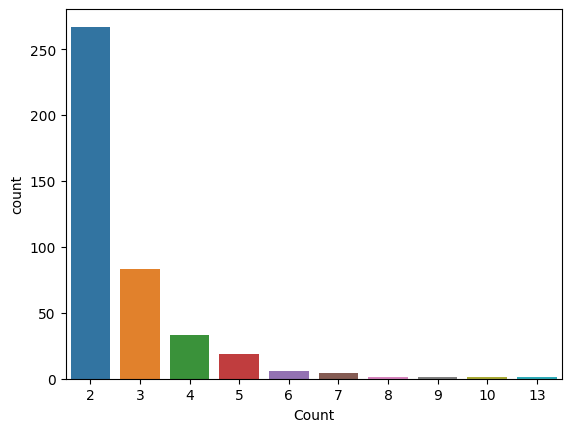

In [ ]:
sns.countplot(data=repeat_customers, x='Count')#, order = most_popular_restaurants);
plt.show()

This countplot shows that more than 250 (13%) customers have ordered at least twice. After this count, the number of customers who have ordered more than twice significantly decreases.

**Observations on `restaurant_name`**

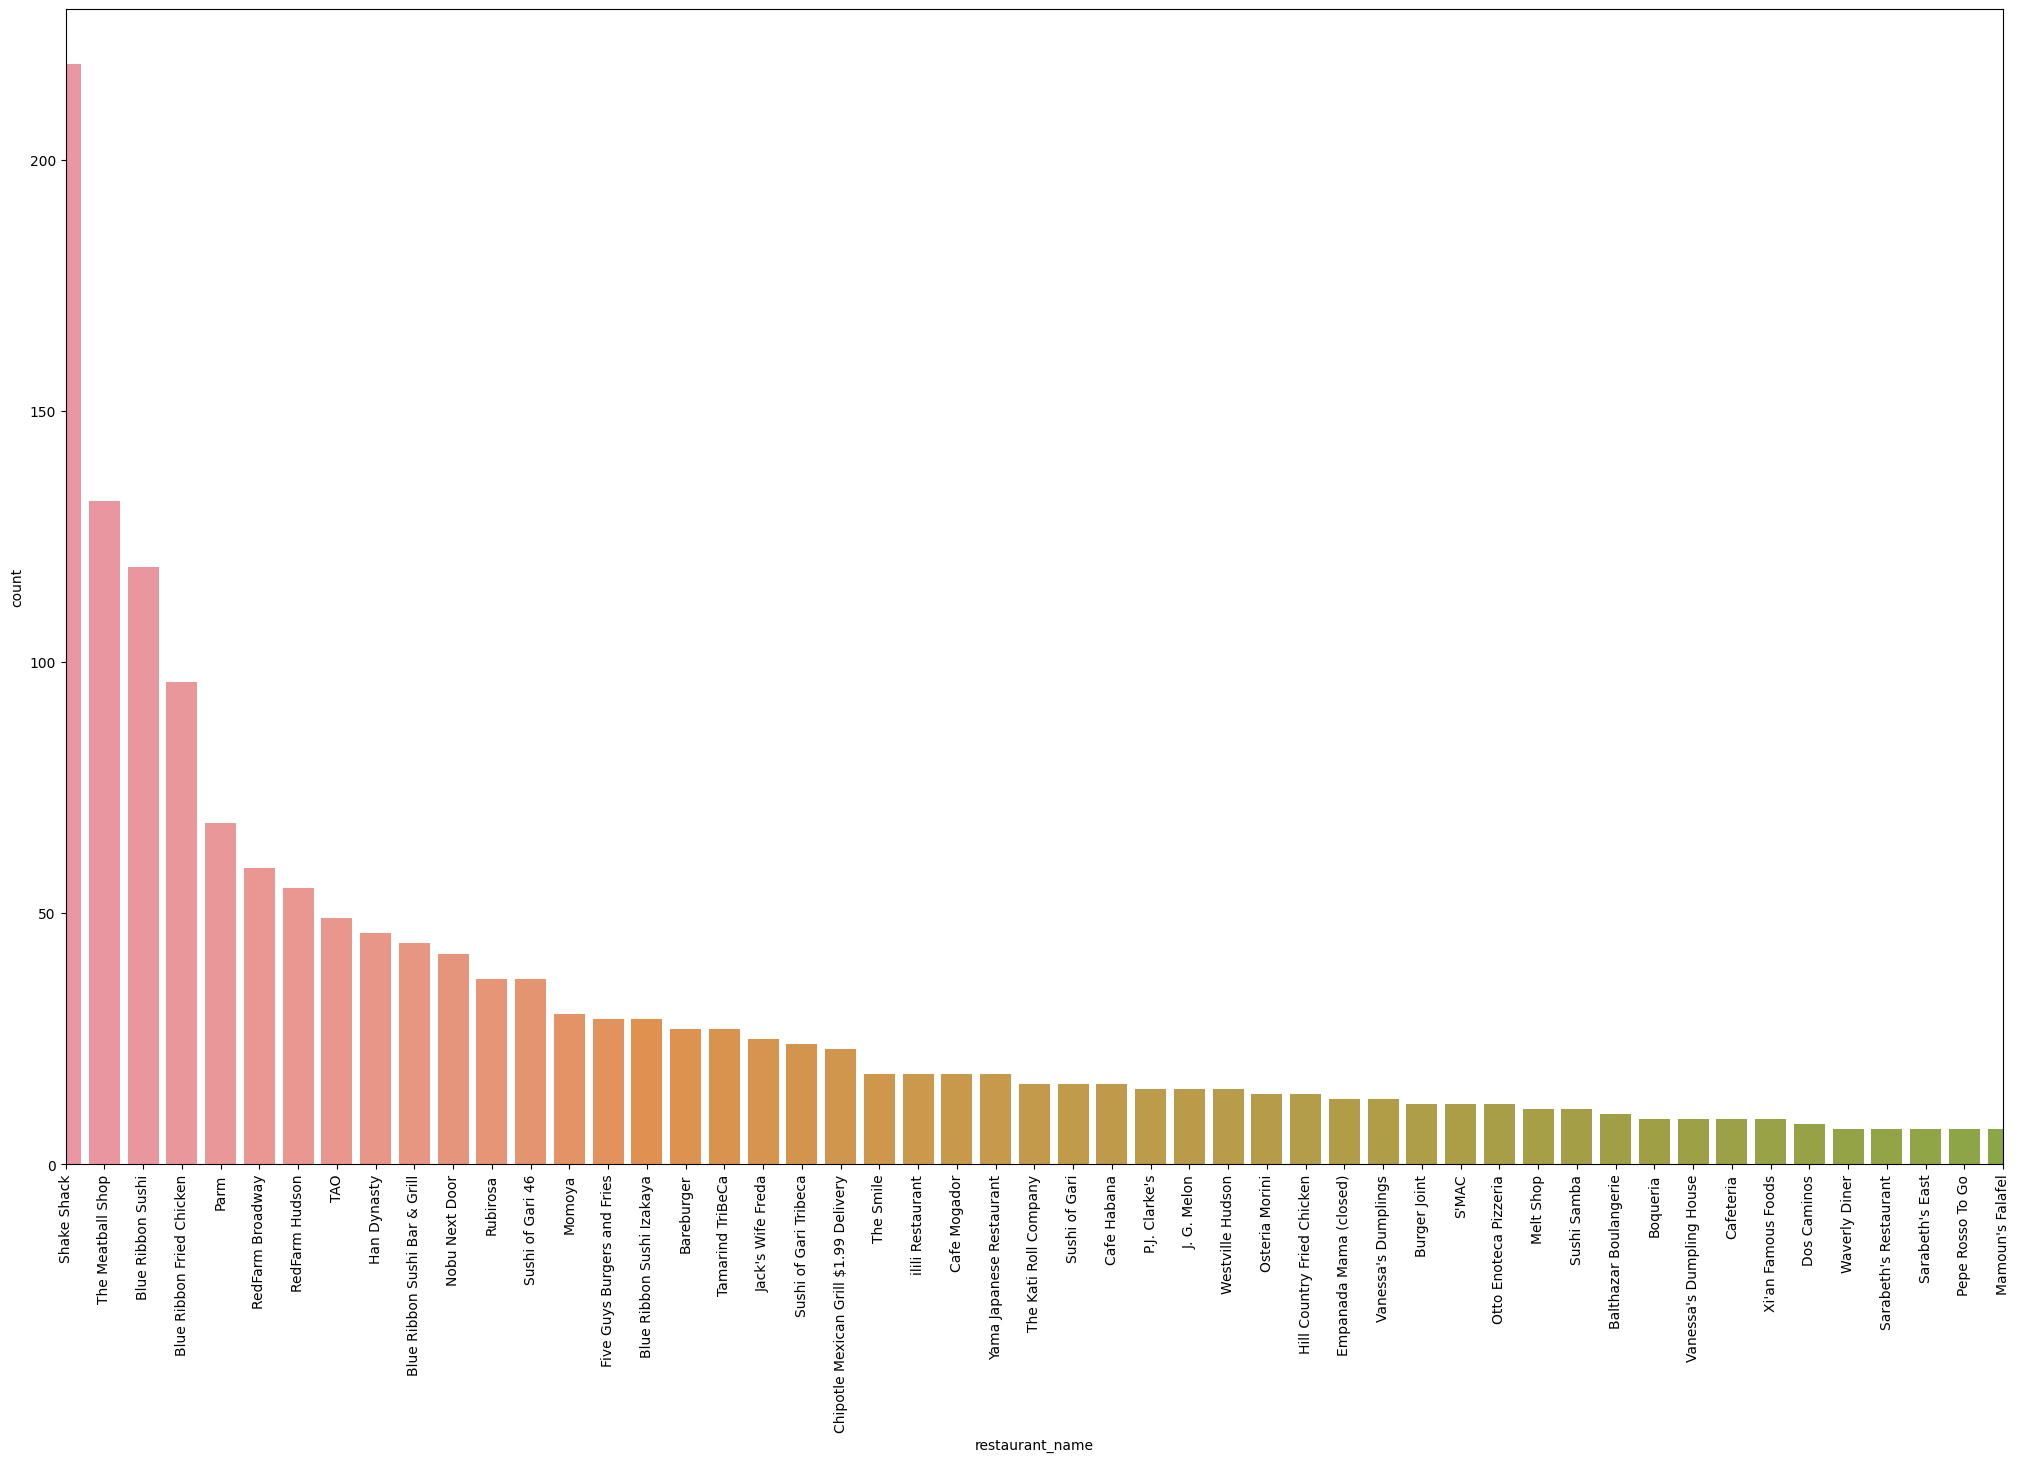

In [ ]:
#List that is ordered from the restaurants with the most order occurances to the least
most_popular_restaurants = df['restaurant_name'].value_counts().index

#Resizes the graph to see the text
plt.figure(figsize=(25,15))
sns.countplot(data=df, x='restaurant_name', order = most_popular_restaurants)
plt.xticks(rotation=90)

#limits the x axis to only the top ordered restaurants
plt.xlim(0, 50)
plt.show()


The countplot provides a distribution of the restaurants have the most orders and are, thus, the most popular. A preliminary observation is that Shake Shack, The Meatball Shop, adn Blue Ribbon Sushi are the most popular restaurants.

**Observations on `cuisine_type`**

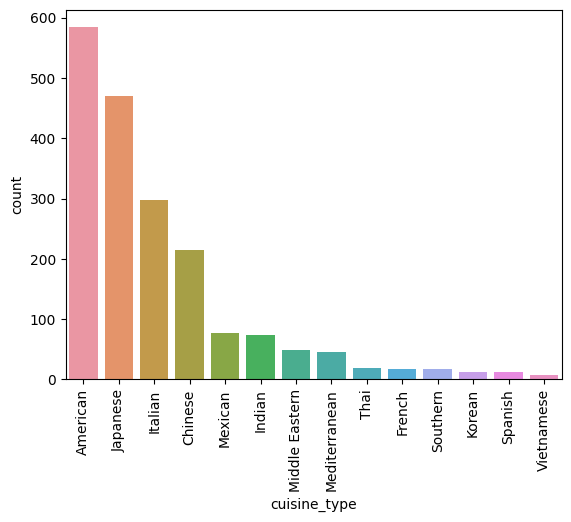

In [ ]:
#list of cuisines arranged by most ordered to least
most_popular_cuisines = df['cuisine_type'].value_counts().index

sns.countplot(data=df, x='cuisine_type', order = most_popular_cuisines)
plt.xticks(rotation=90)
plt.show()

This plot displays the most popular cuisines ordered through Foodhub arranged by order count with 'American' at nearly 600 orders and Japanese at nearly 500 orders.

Observations on `cost_of_the_order`
**bold text**




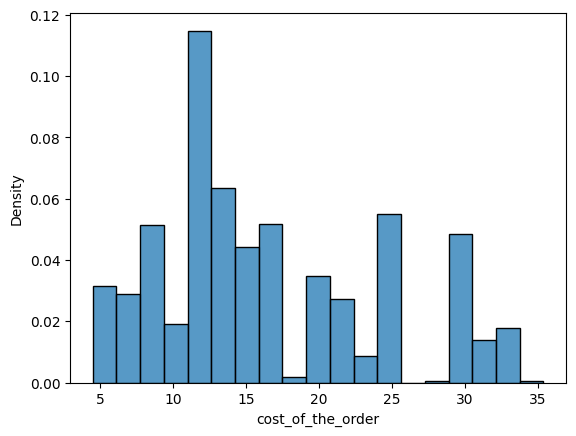

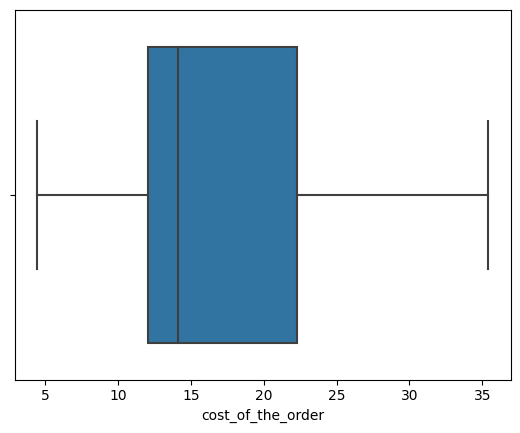

In [ ]:
sns.histplot(data=df,x='cost_of_the_order',stat='density')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

We may observe the distribution of order costs in the histogram and boxplot provided. We may noice that these order costs are skewed towards the right since 25% of the data is between roughly 22 and 35 dollars. The average cost per order is around 14 dollars. There are no outliers present in the data.

**Observations on `day_of_the_week`**

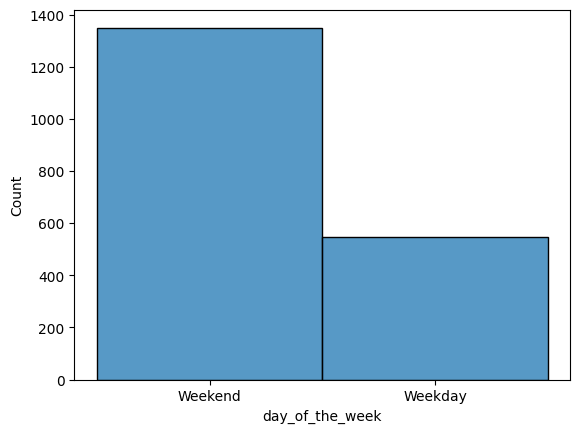

There are 1351 orders during the weekend, and 547 orders during the weekday.


In [ ]:
sns.histplot(data=df, x='day_of_the_week')
plt.show()

print('There are', list(df['day_of_the_week']).count('Weekend'), 'orders during the weekend, and' , list(df['day_of_the_week']).count('Weekday'), 'orders during the weekday.')

Even with only 2 days out of the week, weekend orders are wildly more popular than weekday orders. The weekend commands 71% of total orders in the week. From this data, Foodhub can expect that there would be 147% increase in orders going into the weekend.

**Observations on `rating`**

<Axes: xlabel='rating', ylabel='count'>

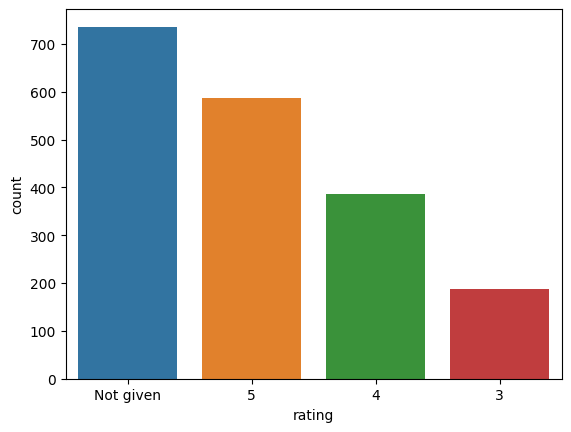

In [ ]:
sns.countplot(x=df['rating'], order = df['rating'].value_counts().index )

We may observe conclusions from the 61% of orders with customers who did leave a rating. Of the 1162 provided ratings, 51% of the orders were given rating 5, 33% with rating 4, and 16% with rating 3. While the majority of rated orders were given rating 5, nearly half of Foodhub's customers who leave a rating are still leaving ratings of less than 5.

Observations on `food_preparation_time`

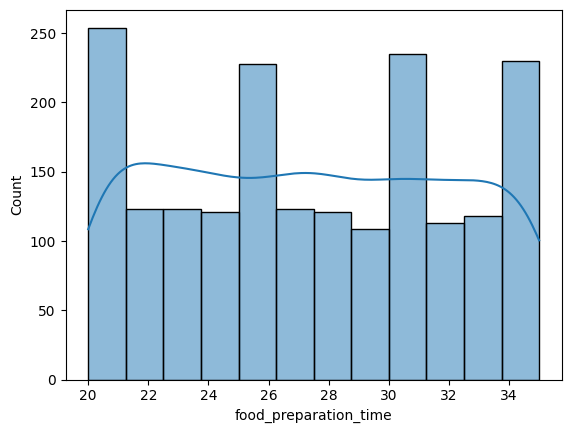

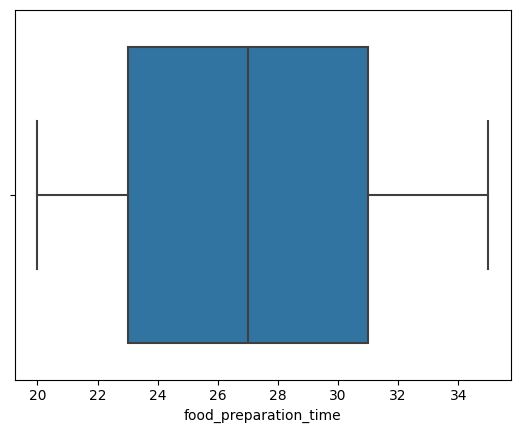

In [ ]:
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

It can be observed that food preparation time after it is ordered is nearly uniformly distributed about its mean. This is reflected in the nearly horizontal kernel density estimate line in the histogram and the even tails in the boxplot. However, it is worth noting that 4 times occur more than twice as often as others: 20, 25, 30, and 34 min.

**Observations on `delivery_time`**

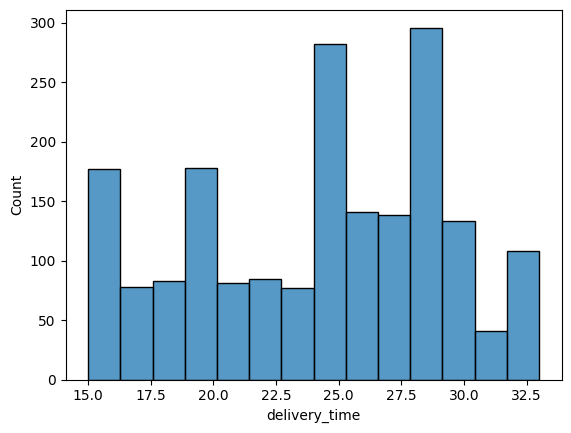

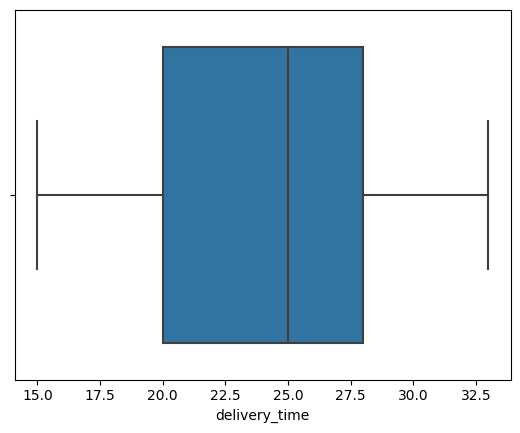

In [ ]:
sns.histplot(data=df, x='delivery_time')
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

From the histogram and boxplot, it can be observed that delivery times are slightly skewed to the left. Average delivery time in this period was 25 min. As in `food_preparation_time`, there are several times that occur most often:
* For delivery times less than 25 minutes:
  * 15 minutes
  * 19 minutes
* For delivery times equal to or more than 25 minutes
  * 25 minutes
  * 28 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#Indexing through a list of restaurants arranged from most ordered to least
for i in most_popular_restaurants[:5]:
  print(i, ' - ', list(df['restaurant_name']).count(i))

Shake Shack  -  219
The Meatball Shop  -  132
Blue Ribbon Sushi  -  119
Blue Ribbon Fried Chicken  -  96
Parm  -  68


#### Observations:


As reflected in the countplot in the `restaurant_name` section above, Shake Shack has the most orders received at 219 orders, The Meatball Shop follows with 132 orders, and Blue Ribbon Sushi has the third most at 119 orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#Filters the dataframe for weekend orders, then arranges cuisines by order count
most_popular_cuisines_weekend = (df.loc[df['day_of_the_week']=='Weekend'])['cuisine_type'].value_counts().index

top = most_popular_cuisines_weekend[0]
print(top, ' - ', list(df['cuisine_type']).count(top))

American  -  584


#### Observations:


The list `most_popular_cuisines_weekend`stores the most popular restaurants by order for only weekend orders. Returning the first entry shows that American is the most orderd cuisine with 584 weekend orders.  

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
sum(df['cost_of_the_order'] > 20)/len(df)

0.2924130663856691

#### Observations:


Using an expression that returns a True value if the cost is greater than 20 dollars, we have 29% of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
np.mean(df['delivery_time'])

24.161749209694417

#### Observations:


Recall that delivery times were observed to be slightly left skewed between 15 and 32 min 30 sec. Delivery times were around 24 minutes on average.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
#array of customer ID's arranged by order counts
repeat_customers_by_orders = df['customer_id'].value_counts().index

for c in repeat_customers_by_orders[:3]:
  print('Customer', c, ' - ', list(df['customer_id']).count(c))

Customer 52832  -  13
Customer 47440  -  10
Customer 83287  -  9


#### Observations:


Using the expressions above, `repeat_customers_by_orders` returns the customer id's with the most orders. Then, we have customers 52832, 47440, and 83287 who will receive the 20% off vouchers for 13, 10, and 9 orders respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
#Creating a column of total time from order to arrival. We apply this to our smaller dataframe and the main df
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

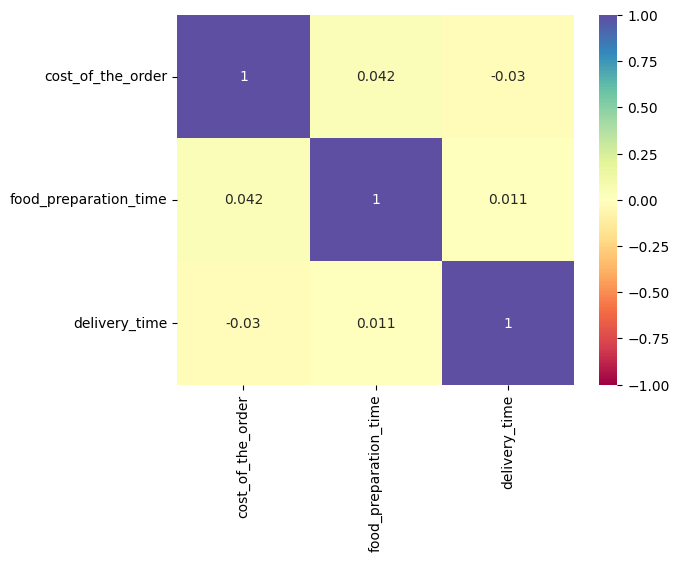

In [ ]:
sns.heatmap(df.iloc[:,[4,7,8]].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

* From this correlation table, no observable correlations can be made between most variables.
* However, there is a high correlation between delivery time and total time. This indiates that orders that have longer total times also have higher delivery times.
* Further exploration is required before making any conjectures of correlation.

**Considering correlations for only rated orders**

In [ ]:
#Dataframe is created only considering rated orders
df_onlyRatings = df.loc[df['rating'] != 'Not given'].copy()

#Converting 3,4,5 object ratings into integers
df_onlyRatings['rating'] = df_onlyRatings['rating'].astype('int64')

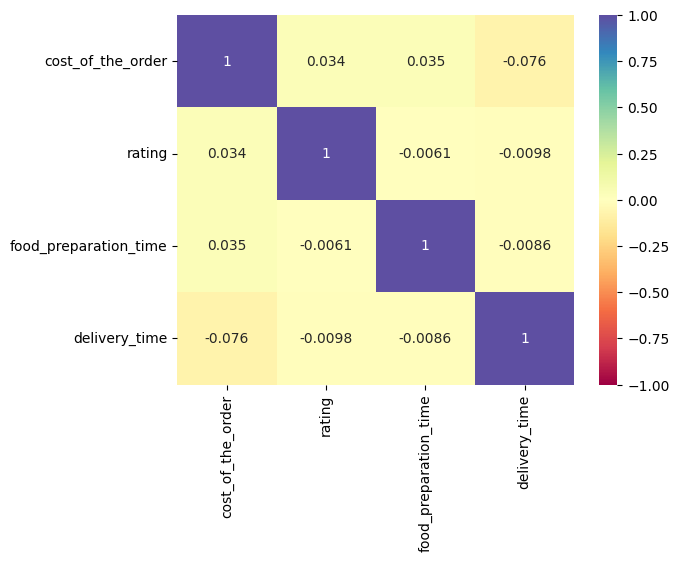

In [ ]:
sns.heatmap(df_onlyRatings.iloc[:,[4,6,7,8]].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

The dataframe considered `df_onlyRatings` is a smaller dataset considering only orders with ratings. Among these orders, we observe the same conclusions as before. No additional correlations can be immediately seen from the added 'rating' feature.

**Day of the week x Total time**

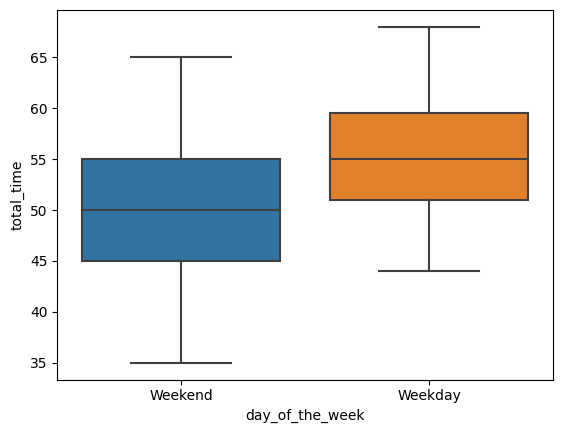

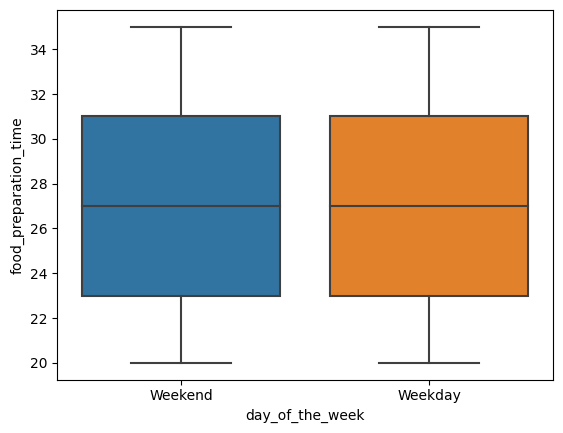

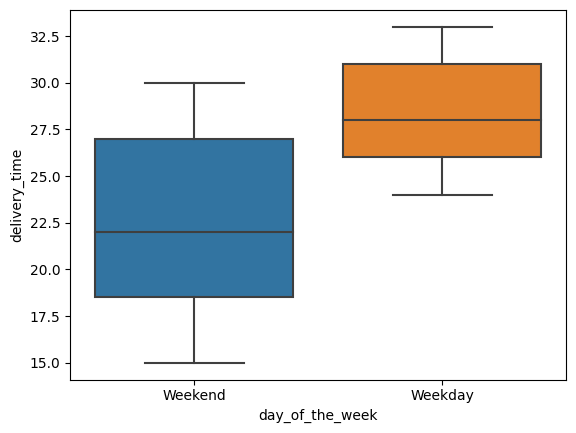

In [ ]:
sns.boxplot(data=df, y='total_time', x='day_of_the_week')
plt.show()
sns.boxplot(data=df, y='food_preparation_time', x='day_of_the_week')
plt.show()
sns.boxplot(data=df, y='delivery_time', x='day_of_the_week')
plt.show()

**Observations**
* Average total time from order to arrival is 50 minutes on Weekends and 55 minutes and Weekdays. Let's investigate whether this difference is caused by preparation or delivery time.
* Preparation time is nearly equal between weekdays and weekends.
* Average delivery time on Weekends is 22 minutes where Weekday delivery time is 28 minutes. Delivery time impacts total time between days of the week.

**Cost x Restaurants by Rating**

To compare if higher rated restaurants have higher costs, we first create a dataframe assigning the nearest rounded integer of rating to each restaurant

In [ ]:
#Initialize the column
df_onlyRatings['Restaurant_Avg_rating'] = 0

#Loop iterating through a unique list of rated restaurant names and assigns average rating
for r in set(df_onlyRatings['restaurant_name']):
  #Takes the average of all ratings found under the restaurant name
  rating = round(np.mean(df_onlyRatings['rating'].loc[df_onlyRatings['restaurant_name']== r ]))
  #This writes our column with the proper average ratings at each mention of the restaurant name in df_onlyRatings
  df_onlyRatings.loc[df_onlyRatings['restaurant_name']== r, 'Restaurant_Avg_rating'] = rating


Now we may provide boxplots of order costs by average rating

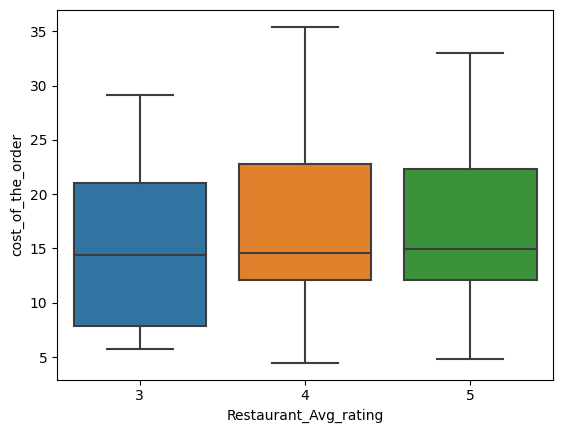

In [ ]:
sns.boxplot(data=df_onlyRatings,x='Restaurant_Avg_rating',y='cost_of_the_order')
plt.show()

In [ ]:
for i in [3,4,5]:
  print('Restaurants with an average rating of', i, 'have an average order cost of', round(np.mean(df_onlyRatings['cost_of_the_order'].loc[df_onlyRatings['Restaurant_Avg_rating'] == i]),2))

Restaurants with an average rating of 3 have an average order cost of 15.0
Restaurants with an average rating of 4 have an average order cost of 16.73
Restaurants with an average rating of 5 have an average order cost of 16.93


Hence, we may reasonably conclude that higher rated restaurants have more expensive orders.

**Rating x Delivery time x Day of the Week**

Now that we have a dataframe with ratings, let's take a look at how delivery time impacts rating.

<Axes: xlabel='delivery_time', ylabel='rating'>

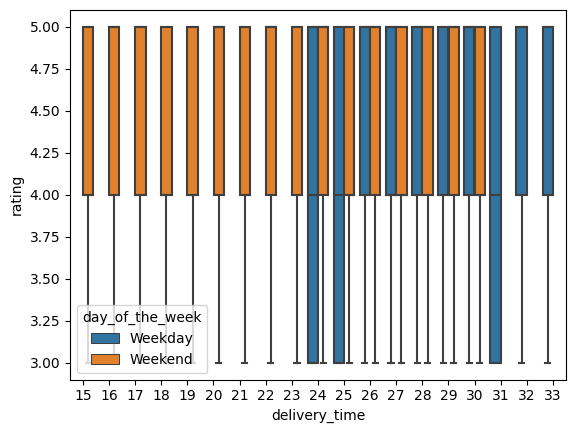

In [ ]:
sns.boxplot(data=df_onlyRatings, y='rating', x='delivery_time', hue='day_of_the_week')

**Observations**
* It is clear that as delivery time increases, there are several more observations of 3 ratings.
* Day of the week is included to demonstrate that weekdays have much higher delivery times as demonstrated above.
* We can conclude that delivery time significantly impacts rating.

**Cost x Cuisine**

We may follow a similar process as above to write a new column  average ratings of each cuisine.

In [ ]:
#Initialize the column
df['Cuisine_Avg_rating'] = 0

#Loop iterating through a unique list of rated restaurant names and assigns average rating
for c in set(df_onlyRatings['cuisine_type']):
  #Takes the average of all ratings in df_onlyRatings found under the cuisine type
  rating = round(np.mean(df_onlyRatings['rating'].loc[df_onlyRatings['cuisine_type']== c ]))
  #This writes our column with the proper average ratings at each mention of the restaurant name in df
  df.loc[df['cuisine_type']== c, 'Cuisine_Avg_rating'] = rating

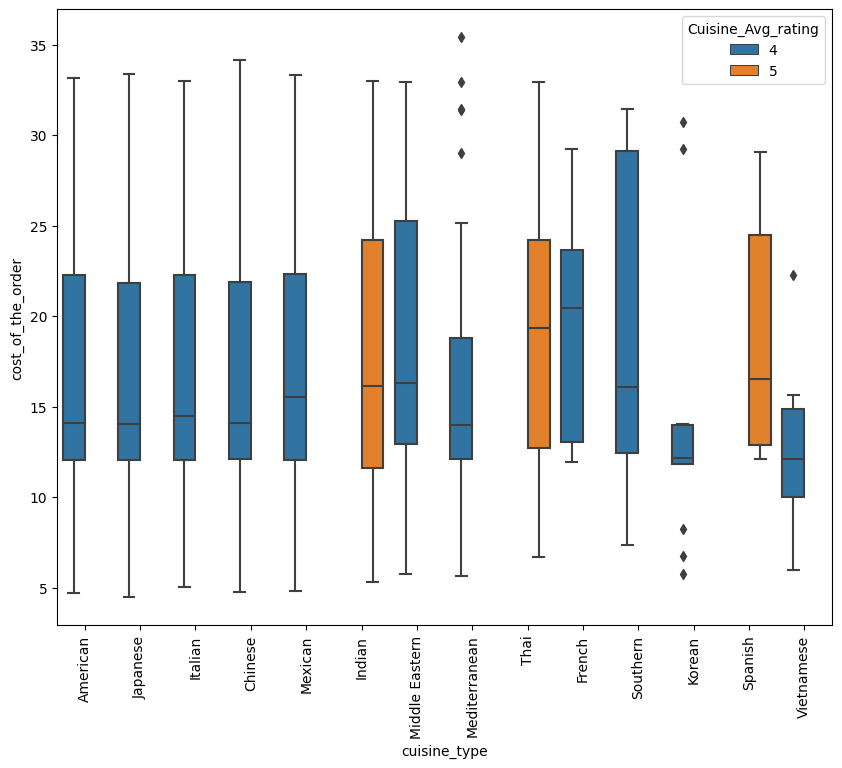

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order', order = most_popular_cuisines, hue = 'Cuisine_Avg_rating' )
plt.xticks(rotation=90)
plt.show()

In [ ]:
print('French average order cost is', round(np.mean(df['cost_of_the_order'].loc[df['cuisine_type']=='French']),2))
print('Thai average order cost is', round(np.mean(df['cost_of_the_order'].loc[df['cuisine_type']=='Thai']),2))
print('Korean average order cost is', round(np.mean(df['cost_of_the_order'].loc[df['cuisine_type']=='Korean']),2))
print('Vietnamese average order cost is', round(np.mean(df['cost_of_the_order'].loc[df['cuisine_type']=='Vietnamese']),2))
print('American average order cost is', round(np.mean(df['cost_of_the_order'].loc[df['cuisine_type']=='American']),2))

French average order cost is 19.79
Thai average order cost is 19.21
Korean average order cost is 14.0
Vietnamese average order cost is 12.88
American average order cost is 16.32


Observations
* This boxplot is arranged from highest order count to least.
* The most ordered cuisines have nearly identical average ordered costs
* The most expensive cuisines are French at 19.79 dollars and Thai at 19.21 dollars.
* The least expensive cuisines are Vietnamese at 12.88 dollars and Korean at 14 dollars.
* Although the most popular cuisines are not the most or least expensive, it is worth noting that most cuisines with average costs around 16.30 dollars are most popular.
* Rating is not a strong indicator of popularity as 4 and 5 ratings are scattered throughout.
* However, Indian, Thai, and Spanish cuisines all have 5 ratings and are among the most expensive cuisines.
  * **We can conclude that more expensive cuisines are more highly rated.**

**Rating x Restaurant x Revenue**

In [ ]:
#By the parameters set in Question 13, the following 4 restaurants are the top rated restaurants
top_rated = ['Shake Shack','The Meatball Shop','Blue Ribbon Sushi','Blue Ribbon Fried Chicken']
            #American, Italian, Japanese, American {Cuisine}

#This loop sums up total revenue earned through the Foodhub service by restaurant
all_revenue = dict()
for r in set(df['restaurant_name']):
  revenue = sum(df['cost_of_the_order'].loc[df['restaurant_name'] == r])
  all_revenue[r] = [revenue]

#Dataframe of [restaurant] = revenue
all_revenue = pd.DataFrame(all_revenue, index=['Revenue']).T
#Sort this stored dataframe by revenue
all_revenue_sorted = all_revenue.sort_values(by=['Revenue'], ascending=False)
all_revenue_sorted.reset_index(inplace=True)

all_revenue_sorted

,index,Revenue
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76
...,...,...
173,Market Table,6.79
174,Wa Jeal,6.74
175,Big Wong Restaurant _¤¾Ñ¼,5.92
176,Cipriani Le Specialita,5.92


**Observations**
* The most highly rated restaurants by the criteria listed in Question 13 are:
  *   Shake Shack
  *  The Meatball Shop
  * Blue Ribbon Sushi
  * Blue Ribbon Fried Chicken
* After sorting the restaurants by earned revenue, we notice that the top rated restaurants are also the restaurants with the highest revenue.
* Hence, maximizing ratings maximizes revenue.

**Revenue x Cuisine**

We've noted that the most popular cuisines are neither the most or least expensive. We also have a dataframe `all_revenue_sorted` that has stored the revenue by restaurant. Let's explore which cuisines command the highest revenue.

In [ ]:
#We will add a column to all_revenue_sorted for cuisine. Initialize the column
all_revenue_sorted['cuisine_type']=0

#Begin by iterating through restaurants
for r in set(all_revenue_sorted['index']):
  #Search through df for the cuisine corresponding to the restaurant
  cuisine = df['cuisine_type'].loc[df['restaurant_name']==r].iloc[0]
  #then assign the cuisine to the restaurant at all locations of restaurant
  all_revenue_sorted.loc[all_revenue_sorted['index']== r, 'cuisine_type'] = cuisine

Now, we may create a dictionary to store the revenue for each cuisine then plot it

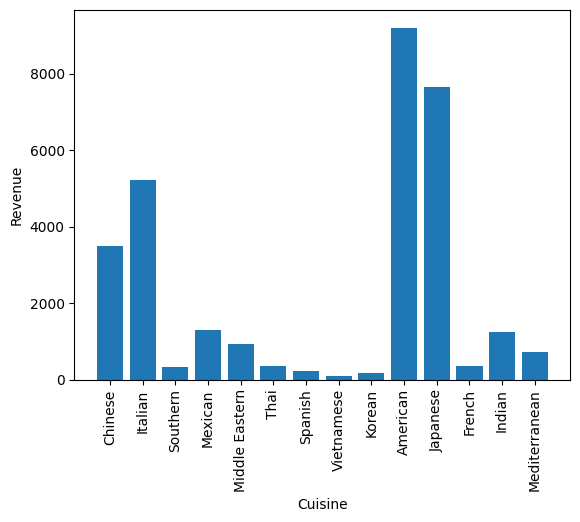

In [ ]:
cuisine_revenue = dict()
for cuisine in set(all_revenue_sorted["cuisine_type"]):
    cuisine_revenue[cuisine] = all_revenue_sorted["Revenue"].loc[all_revenue_sorted["cuisine_type"] == cuisine].sum()

# Create a barplot of the revenue for each cuisine
plt.bar(list(cuisine_revenue.keys()), list(cuisine_revenue.values()))
plt.xlabel("Cuisine")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.show()

Unsurprisingly, the most ordered cuisines command the most revenue.

**Repeat Customers x Cost of Order**

Let's take a look at how the cost of the order behaves among customers who have ordered more than once.

In [ ]:
#begin with dataframe repeat_customers, and add a column to df with counts of orders. Initialize the column
df['customer_order_count']=0

#iterate through customers
for c in set(df['customer_id']):
  #Assign count to all locations of the customer ID
  try:
    df.loc[df['customer_id']== c, 'customer_order_count'] = repeat_customers.loc[c][0]
  #Have to run a keyerror exception since repeat_customers only stores repeat customers. So customers not found have only ordered once
  except KeyError as e:
    df.loc[df['customer_id']== c, 'customer_order_count'] = 1

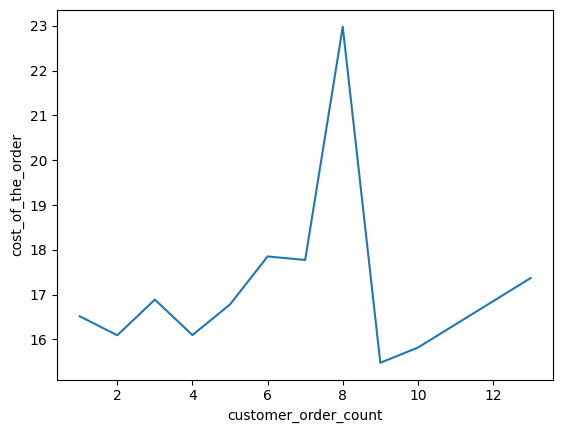

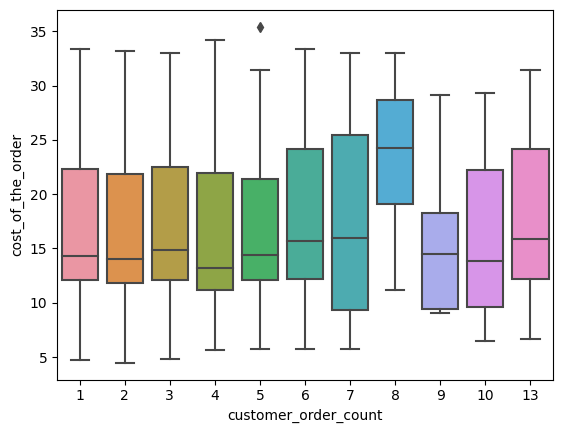

In [ ]:
sns.lineplot(data=df, x='customer_order_count', y ='cost_of_the_order',errorbar=None)
plt.show()
sns.boxplot(data=df,x='customer_order_count',y='cost_of_the_order')
plt.show()

Observations
* From the lineplot and boxplot, it is clear that customers who order more often order more expensive orders.
* Hence, repeat customers are a driver of higher revenue for restaurants.
* The decrease in order cost for customers who order more than 8 times can be explained by a repeat behavior by these customers. This is discussed below.  

<Axes: xlabel='customer_order_count', ylabel='Count'>

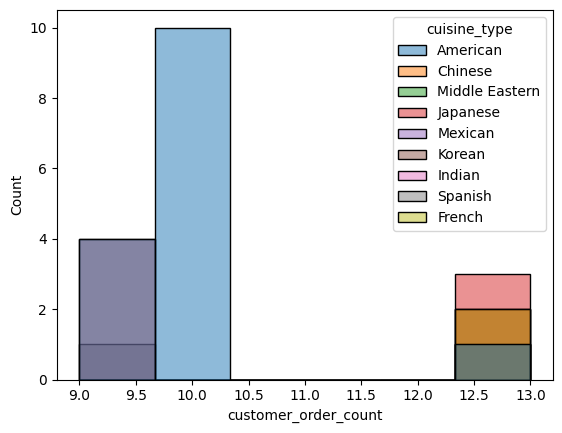

In [ ]:
sns.histplot(data=df.loc[df['customer_order_count'] > 8], x='customer_order_count', hue = 'cuisine_type')

This histogram shows which cuisines are most ordered among customers who have ordered more than 8 times. The x axis is bins of customers by thier order count, and the y axis is the count of orders by cuisine.

Less expensive cuisines, Mexican and American, are most ordered among these customers who order the most. This explains the drop in order cost in the previous boxplot graph. These regular customers are continuing to order from the same places.

**Food Preparation time x Cost of Order**

Let's take a look at how cost of the order behaves as we increase food preparation time. We can do this using line plots for each cuisine.  

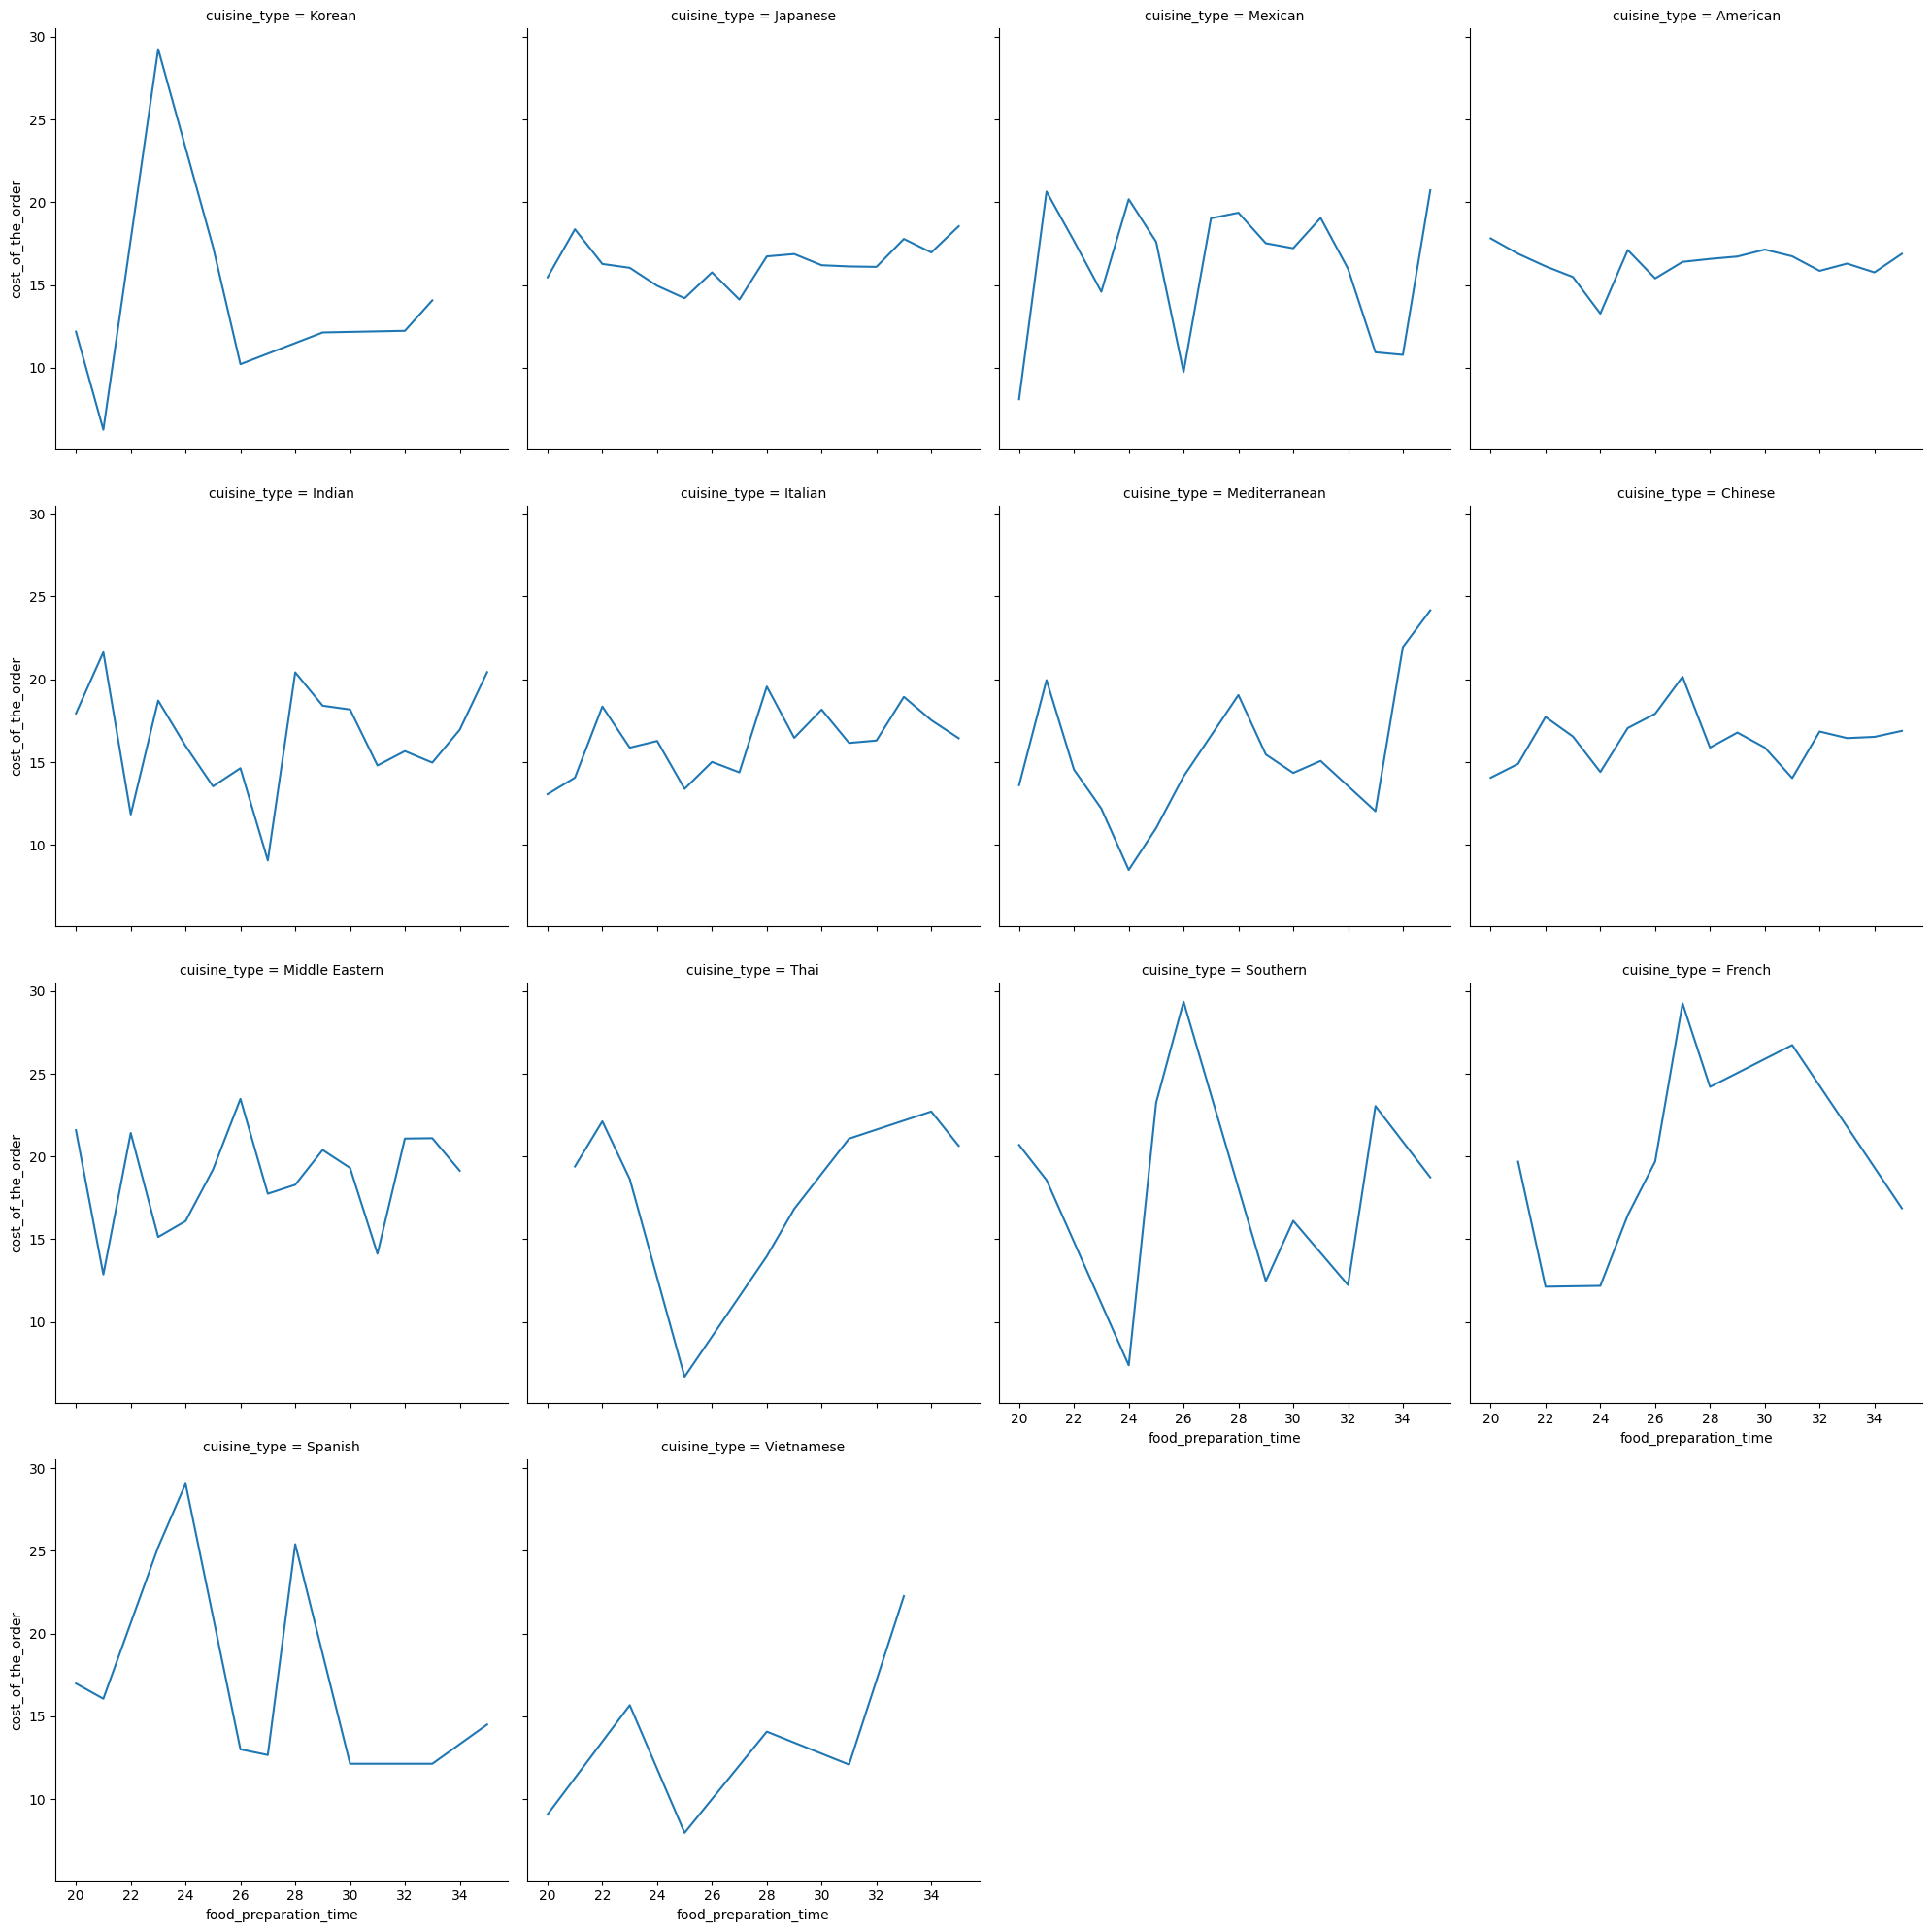

In [ ]:
sns.relplot(data=df, x="food_preparation_time", y="cost_of_the_order", col="cuisine_type", kind="line", errorbar=None, col_wrap=4)
plt.show()

**Observations**
* This relplot provides a lineplot to observe how order cost behaves as food preparation time increases.
* We may notice that in the most popular cuisines (American, Italian, Japanese, Mexian, and Chinese) cost of the order does not increase very much as food preparation time increases.
* This indicates that the food preparation time remains consistent as cost (size of the order) varies.
* This could be a contributor to the popularity of certain cuisines.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#First, we begin with a dataframe with only ratings provdied
df_withratings = df.loc[df['rating'] != 'Not given']

#Reorders restaurants by counts which reflects rating counts since our dataframe no longer has any 'Not given' entries
restaurant_rating_counts = df_withratings['restaurant_name'].value_counts().index

#Prints restaurants meet the criteria
for r in restaurant_rating_counts:
  count = list(df_withratings['restaurant_name']).count(r)
  avg_rating = np.mean((df_withratings['rating'].loc[df_withratings['restaurant_name'] == r ]).astype('int64'))
  if (count > 50) & ( avg_rating >4 ):
    print([r,count, avg_rating])

['Shake Shack', 133, 4.2781954887218046]
['The Meatball Shop', 84, 4.511904761904762]
['Blue Ribbon Sushi', 73, 4.219178082191781]
['Blue Ribbon Fried Chicken', 64, 4.328125]


#### Observations:


From this searching loop, we find that the restaurants:


*   Shake Shack
*  The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken

meet the criteria and will receive the promotional offer.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#orders costing more than 20 dollars
more_than_20 = df['cost_of_the_order'].loc[df['cost_of_the_order'] > 20]
more_than_20.revenue = sum(more_than_20)*0.25

#orders costing less than 20 and greater than 5
less_than_20 = df['cost_of_the_order'].loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]
less_than_20.revenue = sum(less_than_20)*0.15

#Net revenue
net_revenue = more_than_20.revenue + less_than_20.revenue
round(net_revenue,2)

6166.3

#### Observations:


By finding arrays of orders having cost (1) greater than 20 dollars and (2) less than or equal to 20 and greater than 5 dollars, we may solve for the revenue earned by Foodhub. This process returns 6,166.30 dollars in revenue.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
total_time = df['delivery_time'] + df['food_preparation_time']
sum((total_time > 60)==True)/1898

0.1053740779768177

#### Observations:


The array `total_time`adds the delivery timea and food preparation time. Using this and counting how many orders take more than 60 minutes to arrive, the last expression returns 10.5% orders that took this long.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
weekend_deliverytimes = df['delivery_time'].loc[df['day_of_the_week'] == 'Weekend']
weekday_deliverytimes = df['delivery_time'].loc[df['day_of_the_week'] == 'Weekday']

#Mean difference
np.mean(weekend_deliverytimes) - np.mean(weekday_deliverytimes)

-5.870014357297798

#### Observations:


The mean difference between delivery times during the week vs the weekend is high with weekend deliveries being nearly 6 minutes faster on average.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* Longer total times from order to arrival are usually a result of a longer delivery time.
* Delivery times are 27% higher on weekdays than on weekends.
* Weekends observe higher ratings than weekdays, usually as a result of shorter delivery times.
* More highly rated restaurants are around 13% more expensive on average.
* More highly rated cuisines are more expensive.
* The restaurants with the most orders, and are thus the most popular, are also (1) the top rated restaurants and (2) the restaurants with the highest revenue.
* The most popular cuisines also have the highest revenue.
* Cusomers who order between 4 and 8 orders begin to purchase more expensive orders.
* The most popular cuisines have a consistent food preparation time across order costs.




### Recommendations:



* Shortening weekday delivery times could result in higher order ratings.
  * This could be done using driver incentives for delivering the order under 30 minutes. This incentive could be limited to the restaurants within cuisines with surplus revenue, such as American, Italian, Japanese, and Mexican.
* More popular, expensive, and rated restaurants have surplus revenue that Foodhub could capitalize upon.
  * Methods of capturing surplus revenue from these popular restaurants could be:
    * an additional fee on more expensive orders charged to the restaurants, or
    * a surge fee charged to the restaurants during busy periods.
  * These fees would not damage the ratings or popularity of these restaurants.  

* Offer promotions to customers at less popular restaurants with consistent food preparation times.
  * Cuisines with consistent food times have been shown to have positive feedback.
  * This could be in the form of a discounted fee of gross order amount charged to the customer.
  * This promotion would be designed to increase revenue for less popular restaurants.

* Offer promotions to select customers between their 1st and 5th order.
  * Customers between their 5th and 8th order have been shown to order more expensive orders on average.
  * By offering greater consumer surplus to customers to make their 2nd order until their 5th order, average order cost will rise for these repeat customers.
  * This promo will end after their 5th order, but by then, these customers will order more expensive orders on average regardless of the promo ending.
  * This promo could also extend to customers to make their 9th order.
  


---